<a href="https://colab.research.google.com/github/YongeBai/All_Star_Predictor/blob/master/all_star2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/YongeBai/All_Star_Predictor/blob/master/all_star2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NBA All Star predictor

Predict wether a player will be an all star based on rookie year stats

https://www.youtube.com/watch?v=0B5eIE_1vpU

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import csv
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('once')

In [ ]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True
1
0
NVIDIA GeForce GTX 1650
Using device: cuda


In [ ]:
# from google.colab import files
# files.upload()

# 1. Collecting Data 
Using NBA Stats API

https://www.youtube.com/watch?v=IELK56jIsEo

In [ ]:
season_list = [
    '2008-09',
    '2009-10',
    '2010-11',
    '2011-12',
    '2012-13',
    '2013-14',
    '2014-15',
    '2015-16',
    '2016-17',
    '2017-18',
    '2018-19',
    '2019-20',
    '2020-21'
]

headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

dfs = [] 

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for season in season_list:
    
    url = f'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=Rookie&PlayerPosition=&PlusMinus=N&Rank=N&Season={season}&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='
    
    #json response
    response = requests.get(url, headers=headers).json() 
    
    #data frame params
    player_info = response['resultSets'][0]['rowSet']
    col = response['resultSets'][0]['headers']
    
    df = pd.DataFrame(data = player_info, columns = col)
    df['season_id'] = season
    
    dfs.append(df)

In [ ]:
nba_data = pd.concat(dfs, sort=False, ignore_index=True) #creating data frame of all seasons

In [ ]:
# nba_data.tail(10)

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,CFID,CFPARAMS,season_id
1086,1630234,Ty-Shon Alexander,Ty-Shon,1610612756,PHX,22.0,15,11,4,0.733,...,88,91,30,88,31,2,89,5,"1630234,1610612756",2020-21
1087,1630189,Tyler Bey,Tyler,1610612742,DAL,23.0,18,11,7,0.611,...,70,86,56,86,31,2,86,5,"1630189,1610612742",2020-21
1088,1630179,Tyrell Terry,Tyrell,1610612742,DAL,20.0,11,2,9,0.182,...,75,86,24,81,31,2,83,5,"1630179,1610612742",2020-21
1089,1630169,Tyrese Haliburton,Tyrese,1610612758,SAC,21.0,58,25,33,0.431,...,31,4,71,3,3,2,4,5,"1630169,1610612758",2020-21
1090,1630178,Tyrese Maxey,Tyrese,1610612755,PHI,20.0,61,41,20,0.672,...,30,20,36,33,31,2,32,5,"1630178,1610612755",2020-21
1091,1628962,Udoka Azubuike,Udoka,1610612762,UTA,21.0,15,13,2,0.867,...,63,85,82,83,31,2,85,5,"1628962,1610612762",2020-21
1092,1630176,Vernon Carey Jr.,Vernon,1610612766,CHA,20.0,19,9,10,0.474,...,60,70,33,69,31,2,69,5,"1630176,1610612766",2020-21
1093,1630266,Will Magnay,Will,1610612740,NOP,23.0,1,1,0,1.000,...,89,92,94,94,31,2,92,5,"1630266,1610612740",2020-21
1094,1630214,Xavier Tillman Sr.,Xavier,1610612763,MEM,22.0,59,31,28,0.525,...,41,30,13,24,13,2,26,5,"1630214,1610612763",2020-21
1095,1630192,Zeke Nnaji,Zeke,1610612743,DEN,20.0,42,30,12,0.714,...,68,56,53,64,31,2,64,5,"1630192,1610612743",2020-21


In [ ]:
# nba_data.columns

# 2. Preprocessing Data

In [ ]:
useless_cols = ['PLAYER_ID', 'NICKNAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'W_PCT',  'WNBA_FANTASY_PTS', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK',
       'DD2_RANK', 'TD3_RANK', 'WNBA_FANTASY_PTS_RANK', 'CFID', 'CFPARAMS',
       'season_id']

#removing usesless data aka. feature selection :) 
data = nba_data.drop(labels=useless_cols, axis=1)
# data.sample(10)

In [ ]:
#player identifier dict
player_ident = dict(zip(data.index, data.PLAYER_NAME))

# for i in range(10):
#     print(i, player_ident[i])

In [ ]:
url = 'https://raw.githubusercontent.com/YongeBai/All_Star_Predictor/master/all_star_list.csv'
all_star_list = pd.read_csv(url, encoding='latin-1').to_numpy()

In [ ]:
# all_star_list = pd.read_csv('all_star_list.csv', encoding='latin-1').to_numpy()
# all_star_list

In [ ]:
#making a columns saying if player is was all star or not, 0 = not all star 1 = all star

data['ALL_STAR'] = 0
count =0 
players = data.PLAYER_NAME
for i in players.index:
    
    if players[i] in all_star_list:
            count+=1
            data['ALL_STAR'].iloc[i] = 1
            
# data.sample(20)

NameError: name 'data' is not defined

In [ ]:
# no clue why glen rice jr dosent have jr in his name, like THJ didnt have this problem lol
data.at[369, 'ALL_STAR'] = 0
# data.iloc[369]

# 2.1 Exploring the Data 
and doing manual feature selection

In [ ]:
#finding correlations in data
corr = data.corr()

#creating upper triangluar matrix to only show relevent correlations
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True

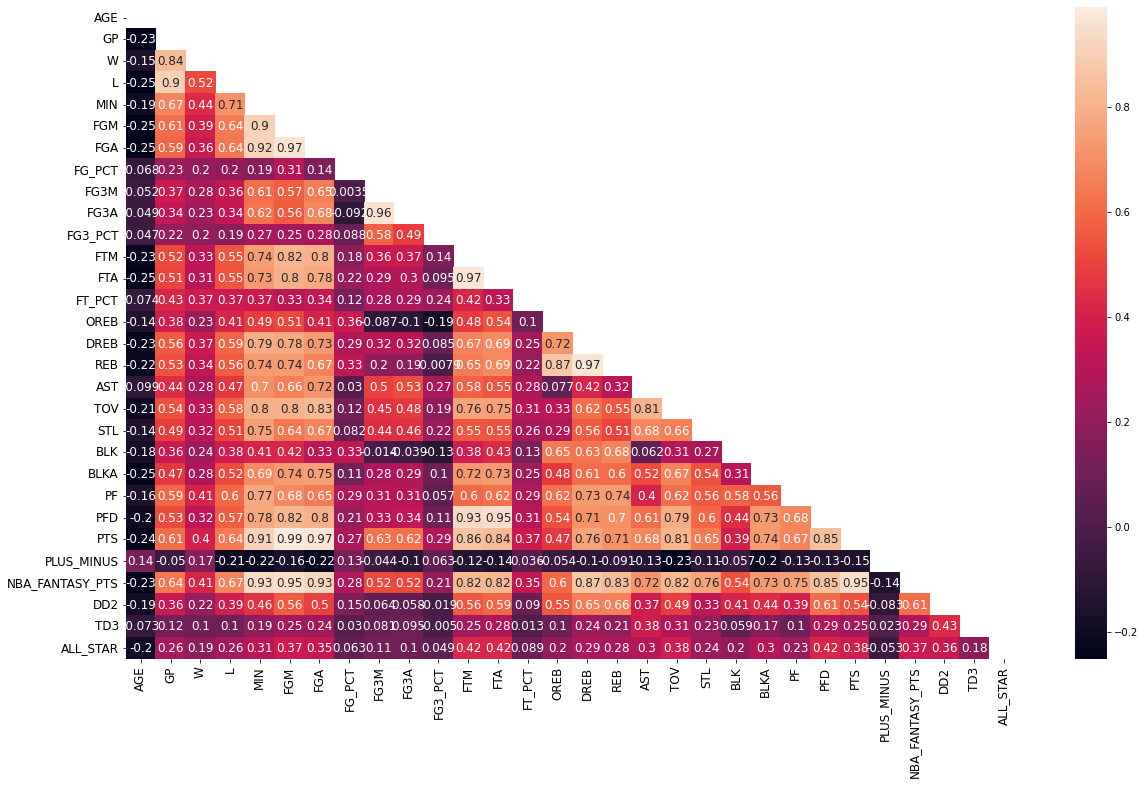

In [ ]:
#plotting cuz pretty
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':12})
sns.set_style('dark')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

somethings have a very high corr (ex. pfd and fta/ftm, pts and fga/fgm) might do more feature selection if needed

In [ ]:
#stats and their correlation to being an all star or not
#Seems like  have least correlation
corr.iloc[29] 

AGE               -0.196937
GP                 0.260248
W                  0.189512
L                  0.256862
MIN                0.310932
FGM                0.372659
FGA                0.350864
FG_PCT             0.063114
FG3M               0.114847
FG3A               0.101677
FG3_PCT            0.049427
FTM                0.419874
FTA                0.420392
FT_PCT             0.088675
OREB               0.202420
DREB               0.286056
REB                0.275362
AST                0.300510
TOV                0.381273
STL                0.242454
BLK                0.199155
BLKA               0.297134
PF                 0.229385
PFD                0.417190
PTS                0.378884
PLUS_MINUS        -0.053480
NBA_FANTASY_PTS    0.372108
DD2                0.361503
TD3                0.183668
ALL_STAR           1.000000
Name: ALL_STAR, dtype: float64

# 2.2 Splitting and Scaling Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X = data.drop(columns=['PLAYER_NAME','ALL_STAR', 'FG_PCT','FG3_PCT','FT_PCT', 'PLUS_MINUS'], inplace = False)
y = data['ALL_STAR']

In [ ]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
# X_cv, X_test, y_cv, y_test = train_test_split(X_,y_,test_size=0.50, random_state=42)

In [ ]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# X_cv = scaler.transform(X_cv)
X_test = scaler.transform(X_test)

In [ ]:
f"# All stars={y.sum(0)}, # players={X.shape[0]}"
#rather unbalanced data set innit

'# All stars=56, # players=1096'

# 3. Model selection

things to adjust for:

metric - i think recall is going to be important cuz its better to predict an all star might just be a solid role player rather than missing an potential all star. Accuracy will porbably be a poor metric since the null acc is very high

network art

params (add class weight since it is a very unbalanced data set)
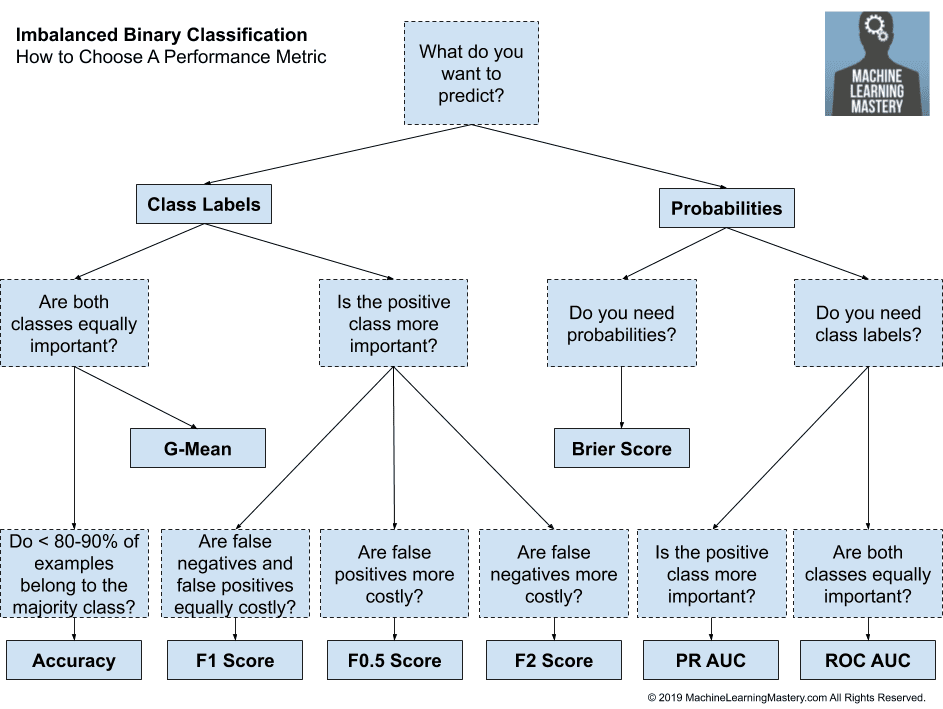

In [ ]:
null_acc = max(y_test.mean(), 1-y_test.mean())
print(null_acc)

0.9454545454545454


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score, make_scorer

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3.1 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000, random_state=42)

In [ ]:
# Log reg params

param_grid_logreg = dict(
    solver = ['lbfgs', 'sag', 'newton-cg'],
    C = [0.01,0.1,1,10,100],
    class_weight = [{0:1, 1:x} for x in np.linspace(7,12,10)]
)

In [ ]:
grid_logreg = GridSearchCV(
    logreg, 
    param_grid_logreg, 
    cv = skf, 
    scoring = {
      'recall':make_scorer(recall_score),
      'F1':make_scorer(f1_score)
    },
    return_train_score=True, 
    refit='F1'
)

grid_logreg.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': [{0: 1, 1: 7.0},
                                          {0: 1, 1: 7.555555555555555},
                                          {0: 1, 1: 8.11111111111111},
                                          {0: 1, 1: 8.666666666666666},
                                          {0: 1, 1: 9.222222222222221},
                                          {0: 1, 1: 9.777777777777779},
                                          {0: 1, 1: 10.333333333333334},
                                          {0: 1, 1: 10.88888888888889},
                                          {0: 1, 1: 11.444444444444445},
                                          {0: 1, 1: 12.0}],
                         'solver': ['lbfgs', 'sag', 'newton-cg']},
             refit='F1', retur

In [ ]:
print(grid_logreg.best_score_)
print(grid_logreg.best_params_)

0.4089646464646465
{'C': 0.01, 'class_weight': {0: 1, 1: 8.11111111111111}, 'solver': 'lbfgs'}


In [ ]:
results_logreg = pd.DataFrame(grid_logreg.cv_results_)
# print(results.columns)

In [ ]:
results_logreg = results_logreg[['params', 
                  'mean_test_recall','mean_train_recall', 'rank_test_recall',
                   'mean_test_F1','mean_train_F1','rank_test_F1']]
results_logreg = results_logreg.sort_values(by=['rank_test_F1'])
results_logreg.head(20)


,params,mean_test_recall,mean_train_recall,rank_test_recall,mean_test_F1,mean_train_F1,rank_test_F1
6,"{'C': 0.01, 'class_weight': {0: 1, 1: 8.111111...",0.560,0.621026,59,0.408965,0.423391,1
8,"{'C': 0.01, 'class_weight': {0: 1, 1: 8.111111...",0.560,0.621026,59,0.408965,0.423391,1
7,"{'C': 0.01, 'class_weight': {0: 1, 1: 8.111111...",0.560,0.621026,59,0.408965,0.423391,1
4,"{'C': 0.01, 'class_weight': {0: 1, 1: 7.555555...",0.535,0.605833,109,0.407698,0.431948,4
5,"{'C': 0.01, 'class_weight': {0: 1, 1: 7.555555...",0.535,0.605833,109,0.407698,0.431948,4
3,"{'C': 0.01, 'class_weight': {0: 1, 1: 7.555555...",0.535,0.605833,109,0.407698,0.431948,4
0,"{'C': 0.01, 'class_weight': {0: 1, 1: 7.0}, 's...",0.510,0.585577,145,0.404603,0.440491,7
1,"{'C': 0.01, 'class_weight': {0: 1, 1: 7.0}, 's...",0.510,0.585577,145,0.404603,0.440491,7
2,"{'C': 0.01, 'class_weight': {0: 1, 1: 7.0}, 's...",0.510,0.585577,145,0.404603,0.440491,7
32,"{'C': 0.1, 'class_weight': {0: 1, 1: 7.0}, 'so...",0.515,0.628526,133,0.389332,0.446396,10


In [ ]:
y_pred_logreg = grid_logreg.predict(X_test)

# 3.2 MLPClassifier

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=10000, random_state=42)

In [ ]:
#MLP params 

param_grid_mlp = dict(
    solver = ['adam', 'lbfgs'],
    hidden_layer_sizes = [(100,), (50,2), (25, 4)],
    alpha = [0.00005,0.0001, 0.001, 0.01, 0.1]
)

In [ ]:
grid_mlp = GridSearchCV(
    mlp, 
    param_grid_mlp, 
    cv = skf, 
    scoring = {
      'recall':make_scorer(recall_score),
      'F1':make_scorer(f1_score)
    },
    return_train_score=True, 
    refit='F1'
)

grid_mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=MLPClassifier(max_iter=10000, random_state=42),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.01, 0.1],
                         'hidden_layer_sizes': [(100,), (50, 2), (25, 4)],
                         'solver': ['adam', 'lbfgs']},
             refit='F1', return_train_score=True,
             scoring={'F1': make_scorer(f1_score),
                      'recall': make_scorer(recall_score)})

In [ ]:
print(grid_mlp.best_score_)
print(grid_mlp.best_params_)

0.3390764790764791
{'alpha': 5e-05, 'hidden_layer_sizes': (25, 4), 'solver': 'lbfgs'}


In [ ]:
results_mlp = pd.DataFrame(grid_mlp.cv_results_)

results_mlp = results_mlp[['params', 
                  'mean_test_recall','mean_train_recall', 'rank_test_recall',
                   'mean_test_F1','mean_train_F1','rank_test_F1']]


In [ ]:
results_mlp = results_mlp.sort_values(by=['rank_test_F1'])
results_mlp.head(20)

,params,mean_test_recall,mean_train_recall,rank_test_recall,mean_test_F1,mean_train_F1,rank_test_F1
5,"{'alpha': 5e-05, 'hidden_layer_sizes': (25, 4)...",0.370,0.982051,1,0.339076,0.932427,1
11,"{'alpha': 0.0001, 'hidden_layer_sizes': (25, 4...",0.345,0.975000,3,0.317051,0.930109,2
17,"{'alpha': 0.001, 'hidden_layer_sizes': (25, 4)...",0.365,0.987500,2,0.316162,0.934373,3
23,"{'alpha': 0.01, 'hidden_layer_sizes': (25, 4),...",0.325,1.000000,4,0.302561,0.941754,4
16,"{'alpha': 0.001, 'hidden_layer_sizes': (25, 4)...",0.245,0.987308,5,0.283413,0.964387,5
22,"{'alpha': 0.01, 'hidden_layer_sizes': (25, 4),...",0.240,0.982372,6,0.276032,0.965564,6
28,"{'alpha': 0.1, 'hidden_layer_sizes': (25, 4), ...",0.200,0.946859,7,0.238016,0.946467,7
27,"{'alpha': 0.1, 'hidden_layer_sizes': (50, 2), ...",0.200,0.851667,7,0.237698,0.887635,8
19,"{'alpha': 0.01, 'hidden_layer_sizes': (100,), ...",0.200,1.000000,7,0.226587,1.000000,9
25,"{'alpha': 0.1, 'hidden_layer_sizes': (100,), '...",0.175,1.000000,14,0.214683,1.000000,10


In [ ]:
y_pred_mlp = grid_mlp.predict(X_test)

# 3.3 XGBoost

https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook

https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#XGBoost params

params_xgb = dict(
    learning_rate = np.arange(0.1,1,0.1),
    gamma = np.arange(0,0.5,0.1),
    max_depth = np.arange(6,12),
    colsample_bytree = np.arange(0.3,0.7,0.1)
)

In [ ]:
grid_xgb = GridSearchCV(
    xgb, 
    params_xgb, 
    cv = skf, 
    scoring = {
      'recall':make_scorer(recall_score),
      'F1':make_scorer(f1_score)
    },
    return_train_score=True, 
    refit='F1'

)

grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(random_state=42),
             param_grid={'colsample_bytree': array([0.3, 0.4, 0.5, 0.6]),
                         'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([ 6,  7,  8,  9, 10, 11])},
             refit='F1', return_train_score=True,
             scoring={'F1': make_scorer(f1_score),
                      'recall': make_scorer(recall_score)})

In [ ]:
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

0.3114285714285715
{'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.8, 'max_depth': 9}


In [ ]:
results_xgb = pd.DataFrame(grid_xgb.cv_results_)

results_xgb = results_xgb[['params', 
                  'mean_test_recall','mean_train_recall', 'rank_test_recall',
                   'mean_test_F1','mean_train_F1','rank_test_F1']]
                    

In [ ]:
results_xgb = results_xgb.sort_values(by=['rank_test_F1'])
results_xgb.head(20)

,params,mean_test_recall,mean_train_recall,rank_test_recall,mean_test_F1,mean_train_F1,rank_test_F1
585,"{'colsample_bytree': 0.5, 'gamma': 0.0, 'learn...",0.225,1.000000,4,0.311429,1.000000,1
587,"{'colsample_bytree': 0.5, 'gamma': 0.0, 'learn...",0.225,1.000000,4,0.306667,1.000000,2
586,"{'colsample_bytree': 0.5, 'gamma': 0.0, 'learn...",0.225,1.000000,4,0.306667,1.000000,2
893,"{'colsample_bytree': 0.6000000000000001, 'gamm...",0.225,0.997500,4,0.303095,0.998734,4
892,"{'colsample_bytree': 0.6000000000000001, 'gamm...",0.225,0.997500,4,0.303095,0.998734,4
891,"{'colsample_bytree': 0.6000000000000001, 'gamm...",0.225,0.997500,4,0.303095,0.998734,4
638,"{'colsample_bytree': 0.5, 'gamma': 0.1, 'learn...",0.220,0.997500,11,0.294762,0.998734,7
753,"{'colsample_bytree': 0.5, 'gamma': 0.300000000...",0.245,0.984872,1,0.288095,0.992339,8
754,"{'colsample_bytree': 0.5, 'gamma': 0.300000000...",0.245,0.984872,1,0.288095,0.992339,8
755,"{'colsample_bytree': 0.5, 'gamma': 0.300000000...",0.245,0.984872,1,0.288095,0.992339,8


In [ ]:
y_pred_xgb = grid_xgb.predict(X_test)

# 3.4 Comparing Models

In [ ]:
print('XGBoost')
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb), '\n')

print('MLP')
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp), '\n')

print('Logreg')
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

XGBoost
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       208
           1       0.50      0.25      0.33        12

    accuracy                           0.95       220
   macro avg       0.73      0.62      0.65       220
weighted avg       0.93      0.95      0.94       220

[[205   3]
 [  9   3]] 

MLP
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       208
           1       0.50      0.25      0.33        12

    accuracy                           0.95       220
   macro avg       0.73      0.62      0.65       220
weighted avg       0.93      0.95      0.94       220

[[205   3]
 [  9   3]] 

Logreg
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       208
           1       0.50      0.67      0.57        12

    accuracy                           0.95       220
   macro avg       0.74      0.81      0.77       220
weigh

## Observations

both the MLP and XGBoost are overfitting on the training set. While the log reg is preforming the best so far. I might try to address the variance issue with them or just go with logreg. 
High var:
- Feature selection
- more data
- more regularzation
- simplier model

# 4. Training Final Model

In [ ]:
param_grid = dict(
    C = np.linspace(0.005,0.3, 20),
    class_weight = [{0:1, 1:x} for x in np.linspace(3,9,15)]
)
# param_grid

In [ ]:
grid = GridSearchCV(
    logreg, 
    param_grid, 
    cv = skf, 
    scoring = {
      'recall':make_scorer(recall_score),
      'F1':make_scorer(f1_score)
    },
    return_train_score=True, 
    refit='recall'

)

grid.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params', 
                  'mean_test_recall','mean_train_recall', 'rank_test_recall',
                   'mean_test_F1','mean_train_F1','rank_test_F1']]
results = results.sort_values(by=['rank_test_F1'])            
results.head(20)

In [ ]:
from sklearn.pipeline import make_pipeline


model = LogisticRegression(max_iter=10000, 
                           C = 0.025, 
                           class_weight={0:1, 1:5}, 
                           random_state=42)
pipe = make_pipeline(scaler, model)

pipe.fit(X_train,y_train)

NameError: name 'LogisticRegression' is not defined

In [ ]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       208
           1       0.64      0.58      0.61        12

    accuracy                           0.96       220
   macro avg       0.81      0.78      0.79       220
weighted avg       0.96      0.96      0.96       220

[[204   4]
 [  5   7]]


# 5. Model Testing

# 5.1 Predicting on 2007-08 draft class

In [ ]:
 #testing on 2007-08 draft class (KD)
url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=Rookie&PlayerPosition=&PlusMinus=N&Rank=N&Season=2007-08&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

#json response
response = requests.get(url, headers=headers).json() 

#data frame params
player_info = response['resultSets'][0]['rowSet']
col = response['resultSets'][0]['headers']

df = pd.DataFrame(data = player_info, columns = col)
df['season_id'] = season

data = df.drop(labels=useless_cols, axis=1)

player_ident = dict(zip(df.index, df.PLAYER_NAME))

In [ ]:
X_07 = data.drop(columns=['PLAYER_NAME','FG_PCT','FG3_PCT','FT_PCT', 'PLUS_MINUS'], inplace = False)
# X_07

In [ ]:
preds = pipe.predict(X_07)

all_stars = []
count = 0

for i in X_07.index:
    if preds[count] == 1:
        all_stars.append(player_ident[i])
        
    count+=1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
all_stars

['Aaron Brooks',
 'Aaron Gray',
 'Acie Law',
 'Al Horford',
 'Al Thornton',
 'Arron Afflalo',
 'Brandan Wright',
 'C.J. Watson',
 'Carl Landry',
 'Chris Richard',
 'Corey Brewer',
 'DJ Strawberry',
 'Daequan Cook',
 'Dominic McGuire',
 'Glen Davis',
 'Jamario Moon',
 'Jared Dudley',
 'Jason Smith',
 'Javaris Crittenton',
 'Jeff Green',
 'Jermareo Davidson',
 'Joakim Noah',
 'Juan Carlos Navarro',
 'Julian Wright',
 'Kevin Durant',
 'Luis Scola',
 'Marco Belinelli',
 'Mario West',
 'Mike Conley',
 'Nick Young',
 'Oleksiy Pecherov',
 'Rodney Stuckey',
 'Sean Williams',
 'Spencer Hawes',
 'Thaddeus Young',
 'Wilson Chandler',
 'Yi Jianlian']

# 6. Predicitons

prediction on 2021-22 rooks

In [ ]:
 #testing on 2007-08 draft class (KD)
url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=Rookie&PlayerPosition=&PlusMinus=N&Rank=N&Season=2021-22&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

#json response
response = requests.get(url, headers=headers).json() 

#data frame params
player_info = response['resultSets'][0]['rowSet']
col = response['resultSets'][0]['headers']

df = pd.DataFrame(data = player_info, columns = col)
df['season_id'] = season

data = df.drop(labels=useless_cols, axis=1)

player_ident = dict(zip(data.index, data.PLAYER_NAME))

In [ ]:
X_21 = data.drop(columns=['PLAYER_NAME','FG_PCT','FG3_PCT','FT_PCT', 'PLUS_MINUS'], inplace = False)

In [ ]:
preds = pipe.predict(X_21)

all_stars = []
count = 0

for i in X_21.index:
    if preds[count] == 1:
        all_stars.append(player_ident[i])
        
    count+=1

all_stars

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


['Aaron Wiggins',
 'Alperen Sengun',
 'Austin Reaves',
 'Ayo Dosunmu',
 'Bones Hyland',
 'Brandon Boston',
 'Brandon Williams',
 'Cade Cunningham',
 'Cam Thomas',
 'Chris Duarte',
 'Corey Kispert',
 'Dalano Banton',
 'Davion Mitchell',
 "Day'Ron Sharpe",
 'Duane Washington Jr.',
 'Evan Mobley',
 'Franz Wagner',
 'Greg Brown III',
 'Herbert Jones',
 'Isaiah Jackson',
 'Ish Wainright',
 'JT Thor',
 'Jalen Green',
 'Jalen Suggs',
 'James Bouknight',
 'Jared Butler',
 'Jeremiah Robinson-Earl',
 'Jericho Sims',
 'Jock Landale',
 'Jonathan Kuminga',
 'Jose Alvarado',
 'Josh Christopher',
 'Josh Giddey',
 'Joshua Primo',
 'Justin Champagnie',
 'Keon Johnson',
 'Kessler Edwards',
 'Leandro Bolmaro',
 'Luka Garza',
 'Miles McBride',
 'Moses Moody',
 'Omer Yurtseven',
 'Quentin Grimes',
 'Sandro Mamukelashvili',
 'Santi Aldama',
 'Scottie Barnes',
 'Terry Taylor',
 'Tre Mann',
 'Trendon Watford',
 'Trey Murphy III',
 'Vit Krejci',
 'Ziaire Williams']

# Observations
my model is shit, I might try to tune an MLP or XGBoost. But rn im going to try to change my eval metric on log reg and see how that works

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

In [ ]:
from sklearn.metrics import average_precision_score, fbeta_score

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
param_grid = dict(
    C = np.arange(0.005,1.5, 0.02),
    class_weight = [{0:1, 1:x} for x in np.linspace(2,10,15)]
)
param_grid

{'C': array([0.005, 0.025, 0.045, 0.065, 0.085, 0.105, 0.125, 0.145, 0.165,
        0.185, 0.205, 0.225, 0.245, 0.265, 0.285, 0.305, 0.325, 0.345,
        0.365, 0.385, 0.405, 0.425, 0.445, 0.465, 0.485, 0.505, 0.525,
        0.545, 0.565, 0.585, 0.605, 0.625, 0.645, 0.665, 0.685, 0.705,
        0.725, 0.745, 0.765, 0.785, 0.805, 0.825, 0.845, 0.865, 0.885,
        0.905, 0.925, 0.945, 0.965, 0.985, 1.005, 1.025, 1.045, 1.065,
        1.085, 1.105, 1.125, 1.145, 1.165, 1.185, 1.205, 1.225, 1.245,
        1.265, 1.285, 1.305, 1.325, 1.345, 1.365, 1.385, 1.405, 1.425,
        1.445, 1.465, 1.485]),
 'class_weight': [{0: 1, 1: 2.0},
  {0: 1, 1: 2.571428571428571},
  {0: 1, 1: 3.142857142857143},
  {0: 1, 1: 3.7142857142857144},
  {0: 1, 1: 4.285714285714286},
  {0: 1, 1: 4.857142857142857},
  {0: 1, 1: 5.428571428571429},
  {0: 1, 1: 6.0},
  {0: 1, 1: 6.571428571428571},
  {0: 1, 1: 7.142857142857142},
  {0: 1, 1: 7.7142857142857135},
  {0: 1, 1: 8.285714285714285},
  {0: 1, 1: 8.85714285

In [ ]:
grid = GridSearchCV(
    logreg, 
    param_grid, 
    cv = skf, 
    scoring = {
      'recall':make_scorer(recall_score),
      'F1':make_scorer(f1_score),
      'PR_AUC':make_scorer(average_precision_score)
    },
    return_train_score=True, 
    refit='PR_AUC',
    n_jobs=-1
)

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([0.005, 0.025, 0.045, 0.065, 0.085, 0.105, 0.125, 0.145, 0.165,
       0.185, 0.205, 0.225, 0.245, 0.265, 0.285, 0.305, 0.325, 0.345,
       0.365, 0.385, 0.405, 0.425, 0.445, 0.465, 0.485, 0.505, 0.525,
       0.545, 0.565, 0.585, 0....
                                          {0: 1, 1: 5.428571428571429},
                                          {0: 1, 1: 6.0},
                                          {0: 1, 1: 6.571428571428571},
                                          {0: 1, 1: 7.142857142857142},
                                          {0: 1, 1: 7.7142857142857135},
                                          {0: 1, 1: 8.285714285714285},
                                          {0: 1, 1: 8.857142857142858},
                                          {0: 1, 1: 9.4285

In [ ]:
results = pd.DataFrame(grid.cv_results_)
results = results[['params',
                   'mean_test_PR_AUC', 'mean_train_PR_AUC', 'rank_test_PR_AUC', 
                  'mean_test_recall','mean_train_recall', 'rank_test_recall',
                   'mean_test_F1','mean_train_F1','rank_test_F1']]
results = results.sort_values(by=['rank_test_PR_AUC'])            
results.head(20)

,params,mean_test_PR_AUC,mean_train_PR_AUC,rank_test_PR_AUC,mean_test_recall,mean_train_recall,rank_test_recall,mean_test_F1,mean_train_F1,rank_test_F1
20,"{'C': 0.025, 'class_weight': {0: 1, 1: 4.85714...",0.263382,0.250311,1,0.445,0.517372,745,0.439613,0.472496,1
8,"{'C': 0.005, 'class_weight': {0: 1, 1: 6.57142...",0.256132,0.232325,2,0.485,0.557821,640,0.425085,0.449071,4
3,"{'C': 0.005, 'class_weight': {0: 1, 1: 3.71428...",0.252177,0.225492,3,0.395,0.408910,856,0.417251,0.440633,76
7,"{'C': 0.005, 'class_weight': {0: 1, 1: 6.0}}",0.246865,0.238618,4,0.460,0.537756,739,0.396752,0.458374,214
9,"{'C': 0.005, 'class_weight': {0: 1, 1: 7.14285...",0.241254,0.228319,5,0.510,0.570513,399,0.420336,0.442581,39
18,"{'C': 0.025, 'class_weight': {0: 1, 1: 3.71428...",0.240897,0.248185,6,0.395,0.457051,856,0.407799,0.468731,127
37,"{'C': 0.045, 'class_weight': {0: 1, 1: 6.0}}",0.240868,0.235492,7,0.515,0.572885,350,0.428795,0.451022,2
34,"{'C': 0.045, 'class_weight': {0: 1, 1: 4.28571...",0.240234,0.257268,8,0.420,0.504872,815,0.424079,0.480152,5
22,"{'C': 0.025, 'class_weight': {0: 1, 1: 6.0}}",0.239613,0.239310,9,0.510,0.565385,399,0.419078,0.456927,42
23,"{'C': 0.025, 'class_weight': {0: 1, 1: 6.57142...",0.239167,0.233552,10,0.535,0.588141,247,0.422106,0.447396,22


## Observations 
switching metrics showed how bad log reg is. I will see how F2 works and probs use avg prec and it to train XGBoost after doing:
1. feature select
2. getting more data
3. more reg

# Do it again :)

# 1. Feature selection

In [ ]:
# selecting features to address overfitting
bad_features = [] # list of 'poor' features
all_star_feat = corr.iloc[29] # pandas series of features and their correlation to a player becoming an all star

# if a feature has a correlation less than 0.3 add it to feature list
for i in range(len(all_star_feat)):
  if abs(all_star_feat[i]) < 0.3:
    bad_features.append(all_star_feat.index[i])


# adding potentially redundant features
bad_features.append('FGM')
bad_features.append('FGA')
bad_features.append('FTM')
bad_features.append('FTA')

#remvoing all star and name
bad_features.append('ALL_STAR')
bad_features.append('PLAYER_NAME')

bad_features

['AGE',
 'GP',
 'W',
 'L',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FT_PCT',
 'OREB',
 'DREB',
 'REB',
 'STL',
 'BLK',
 'BLKA',
 'PF',
 'PLUS_MINUS',
 'TD3',
 'FGM',
 'FGA',
 'FTM',
 'FTA',
 'ALL_STAR',
 'PLAYER_NAME']

In [ ]:
X = data.drop(columns=bad_features, inplace = False)
y = data['ALL_STAR']

# 1.1 Splitting and scaling data again

In [ ]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. MLP vs XGBoost

In [ ]:
# first needa make F2 metric func

def f2_func(y_true, y_pred):
    f2_score = fbeta_score(y_true, y_pred, beta=2)
    return f2_score

# 2.1 MLP

In [ ]:
param_grid_mlp = dict(
    solver = ['adam', 'lbfgs'],
    hidden_layer_sizes = [(100,), (50,2), (25, 4)],
    alpha = [0.00005,0.0001, 0.001, 0.01, 0.1, 1]
)

In [ ]:
grid_mlp = GridSearchCV(
    mlp, 
    param_grid_mlp, 
    cv = skf, 
    scoring = {
      'PR_AUC':make_scorer(average_precision_score),
      'F2':make_scorer(f2_func)
    },
    return_train_score=True, 
    refit='F2',
    n_jobs=-1
)

grid_mlp.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=MLPClassifier(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'hidden_layer_sizes': [(100,), (50, 2), (25, 4)],
                         'solver': ['adam', 'lbfgs']},
             refit='F2', return_train_score=True,
             scoring={'F2': make_scorer(f2_func),
                      'PR_AUC': make_scorer(average_precision_score)})

In [ ]:
results_mlp = pd.DataFrame(grid_mlp.cv_results_)

results_mlp = results_mlp[['params', 
                  'mean_test_PR_AUC','mean_train_PR_AUC', 'rank_test_PR_AUC',
                   'mean_test_F2','mean_train_F2','rank_test_F2']]
results_mlp = results_mlp.sort_values(by=['rank_test_F2'])
results_mlp.head(20)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,params,mean_test_PR_AUC,mean_train_PR_AUC,rank_test_PR_AUC,mean_test_F2,mean_train_F2,rank_test_F2
15,"{'alpha': 0.001, 'hidden_layer_sizes': (50, 2)...",0.150692,0.882111,3,0.330256,0.972694,1
27,"{'alpha': 0.1, 'hidden_layer_sizes': (50, 2), ...",0.128910,0.844800,10,0.284812,0.956511,2
3,"{'alpha': 5e-05, 'hidden_layer_sizes': (50, 2)...",0.119239,0.865019,13,0.280601,0.968415,3
9,"{'alpha': 0.0001, 'hidden_layer_sizes': (50, 2...",0.103175,0.844210,18,0.253319,0.959901,4
20,"{'alpha': 0.01, 'hidden_layer_sizes': (50, 2),...",0.154405,0.245757,2,0.226798,0.312309,5
33,"{'alpha': 1, 'hidden_layer_sizes': (50, 2), 's...",0.108837,0.685465,16,0.210906,0.782654,6
32,"{'alpha': 1, 'hidden_layer_sizes': (50, 2), 's...",0.182771,0.197504,1,0.207479,0.250959,7
7,"{'alpha': 0.0001, 'hidden_layer_sizes': (100,)...",0.078510,1.000000,30,0.205039,1.000000,8
8,"{'alpha': 0.0001, 'hidden_layer_sizes': (50, 2...",0.135178,0.243351,6,0.203080,0.311832,9
2,"{'alpha': 5e-05, 'hidden_layer_sizes': (50, 2)...",0.135178,0.253682,6,0.203080,0.323892,9


In [ ]:
y_pred_mlp = grid_mlp.predict(X_test)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 2.2 XGBoost

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook

In [ ]:
params_xgb = dict(
    learning_rate = np.arange(0.01,1,0.1),
    gamma = np.arange(0,0.5,0.1),
    max_depth = np.arange(2,8),
    colsample_bytree = np.arange(0.3,0.7,0.1),
    max_delta_step = range(1,5),
    reg_lambda = range(1,3)
)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
grid_xgb = GridSearchCV(
    xgb, 
    params_xgb, 
    cv = skf, 
    scoring = {
      'PR_AUC':make_scorer(average_precision_score),
      'F2':make_scorer(f2_func)
    },
    return_train_score=True, 
    refit='F2',
    n_jobs=-1
)

grid_xgb.fit(X_train, y_train)

[14:46:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yonge\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_c...
             param_grid={'colsample_bytree': array([0.3, 0.4, 0.5, 0.6]),
                         'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'learning_rate': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91]),
                         'max_delta_step': range(1, 5),
            

In [ ]:
results_xgb = pd.DataFrame(grid_xgb.cv_results_)

results_xgb = results_xgb[['params', 
                  'mean_test_PR_AUC','mean_train_PR_AUC', 'rank_test_PR_AUC',
                   'mean_test_F2','mean_train_F2','rank_test_F2']]
results_xgb = results_xgb.sort_values(by=['rank_test_F2'])
results_xgb.head(20)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,params,mean_test_PR_AUC,mean_train_PR_AUC,rank_test_PR_AUC,mean_test_F2,mean_train_F2,rank_test_F2
446,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.111160,0.978443,1591,0.235157,0.981738,1
2846,"{'colsample_bytree': 0.4, 'gamma': 0.0, 'learn...",0.111160,0.978443,1591,0.235157,0.981738,1
2858,"{'colsample_bytree': 0.4, 'gamma': 0.0, 'learn...",0.111160,0.978443,1591,0.235157,0.981738,1
2870,"{'colsample_bytree': 0.4, 'gamma': 0.0, 'learn...",0.111160,0.978443,1591,0.235157,0.981738,1
458,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.111160,0.978443,1591,0.235157,0.981738,1
470,"{'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...",0.111160,0.978443,1591,0.235157,0.981738,1
3672,"{'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...",0.125272,0.800558,210,0.221050,0.824266,7
3660,"{'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...",0.125272,0.800558,210,0.221050,0.824266,7
3684,"{'colsample_bytree': 0.4, 'gamma': 0.2, 'learn...",0.125272,0.800558,210,0.221050,0.824266,7
1260,"{'colsample_bytree': 0.3, 'gamma': 0.2, 'learn...",0.125272,0.800558,210,0.221050,0.824266,7


In [ ]:
results_xgb[(results_xgb.mean_test_PR_AUC > 0.15) and (results_xgb.mean_test_F2 > 0.2)]

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
good = results_xgb[(results_xgb.mean_test_PR_AUC > 0.15)]
with pd.option_context('display.max_colwidth', None):
    display(pd.DataFrame(good))


C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,params,mean_test_PR_AUC,mean_train_PR_AUC,rank_test_PR_AUC,mean_test_F2,mean_train_F2,rank_test_F2
4735,"{'colsample_bytree': 0.4, 'gamma': 0.4, 'learning_rate': 0.81, 'max_delta_step': 3, 'max_depth': 5, 'reg_lambda': 2}",0.150624,0.854212,5,0.219530,0.872757,15
2323,"{'colsample_bytree': 0.3, 'gamma': 0.4, 'learning_rate': 0.81, 'max_delta_step': 2, 'max_depth': 5, 'reg_lambda': 2}",0.150624,0.854212,5,0.219530,0.872757,15
4747,"{'colsample_bytree': 0.4, 'gamma': 0.4, 'learning_rate': 0.81, 'max_delta_step': 4, 'max_depth': 5, 'reg_lambda': 2}",0.150624,0.854212,5,0.219530,0.872757,15
2335,"{'colsample_bytree': 0.3, 'gamma': 0.4, 'learning_rate': 0.81, 'max_delta_step': 3, 'max_depth': 5, 'reg_lambda': 2}",0.150624,0.854212,5,0.219530,0.872757,15
2347,"{'colsample_bytree': 0.3, 'gamma': 0.4, 'learning_rate': 0.81, 'max_delta_step': 4, 'max_depth': 5, 'reg_lambda': 2}",0.150624,0.854212,5,0.219530,0.872757,15
4723,"{'colsample_bytree': 0.4, 'gamma': 0.4, 'learning_rate': 0.81, 'max_delta_step': 2, 'max_depth': 5, 'reg_lambda': 2}",0.150624,0.854212,5,0.219530,0.872757,15
1782,"{'colsample_bytree': 0.3, 'gamma': 0.30000000000000004, 'learning_rate': 0.7100000000000001, 'max_delta_step': 1, 'max_depth': 5, 'reg_lambda': 1}",0.156762,0.940599,3,0.216768,0.949258,30
4182,"{'colsample_bytree': 0.4, 'gamma': 0.30000000000000004, 'learning_rate': 0.7100000000000001, 'max_delta_step': 1, 'max_depth': 5, 'reg_lambda': 1}",0.156762,0.940599,3,0.216768,0.949258,30
4130,"{'colsample_bytree': 0.4, 'gamma': 0.30000000000000004, 'learning_rate': 0.6100000000000001, 'max_delta_step': 1, 'max_depth': 3, 'reg_lambda': 1}",0.167928,0.902914,1,0.185719,0.916260,584
1730,"{'colsample_bytree': 0.3, 'gamma': 0.30000000000000004, 'learning_rate': 0.6100000000000001, 'max_delta_step': 1, 'max_depth': 3, 'reg_lambda': 1}",0.167928,0.902914,1,0.185719,0.916260,584


In [ ]:
y_pred_xgb = grid_xgb.predict(X_test)

# 3. Comparing Models

In [ ]:
print('XGBoost')
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb), '\n')

print('MLP')
print(classification_report(y_test, y_pred_mlp))
print(confusion_matrix(y_test, y_pred_mlp), '\n')

XGBoost
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       208
           1       0.75      0.25      0.38        12

    accuracy                           0.95       220
   macro avg       0.85      0.62      0.68       220
weighted avg       0.95      0.95      0.94       220

[[207   1]
 [  9   3]] 

MLP
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       208
           1       0.33      0.25      0.29        12

    accuracy                           0.93       220
   macro avg       0.65      0.61      0.62       220
weighted avg       0.92      0.93      0.93       220

[[202   6]
 [  9   3]] 



## Observations

XGBoost seems better porbs gonna run a randomized grid search to further tune, ill porbs need to get more data as well

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [ ]:
xgb = XGBClassifier(objective='binary:logistic', max_depth = 5, max_delta_step = 3,random_state=42)

In [ ]:
params_xgb = dict(
    learning_rate = np.linspace(0.6,0.9,5),
    gamma = np.linspace(0.3,0.5,5),
    colsample_bytree = np.linspace(0.1,0.4,5),
    max_delta_step = range(1,5),
    reg_lambda = np.linspace(0.5,2.5,5)
)

In [ ]:
#finding out how long 1 iter of rand takes
rand_xgb = RandomizedSearchCV(
    xgb, 
    params_xgb, 
    n_iter=1,
    cv = skf, 
    scoring = {
      'PR_AUC':make_scorer(average_precision_score),
      'F2':make_scorer(f2_func)
    },
    return_train_score=True, 
    refit='F2',
    n_jobs=-1
)

t = time.time()
rand_xgb.fit(X_train, y_train)
time.time() - t

[18:16:54] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yonge\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1.0043153762817383

In [ ]:
rand_xgb = RandomizedSearchCV(
    xgb, 
    params_xgb, 
    n_iter=1800,
    cv = skf, 
    scoring = {
      'PR_AUC':make_scorer(average_precision_score),
      'F2':make_scorer(f2_func)
    },
    return_train_score=True, 
    refit='F2',
    n_jobs=-1
)

rand_xgb.fit(X_train, y_train)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[18:25:41] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yonge\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=5,
                                           mi...
                   n_iter=1800, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.1  , 0.175, 0.25 , 0.325, 0.4  ]),
                                        'gamma': array([0.3 , 0.35, 0.4 , 0.4

In [ ]:
results_xgb = pd.DataFrame(rand_xgb.cv_results_)

results_xgb = results_xgb[['params', 
                  'mean_test_PR_AUC','mean_train_PR_AUC', 'rank_test_PR_AUC',
                   'mean_test_F2','mean_train_F2','rank_test_F2']]
results_xgb = results_xgb.sort_values(by=['rank_test_F2'])
results_xgb.head(20)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,params,mean_test_PR_AUC,mean_train_PR_AUC,rank_test_PR_AUC,mean_test_F2,mean_train_F2,rank_test_F2
791,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'lear...",0.163231,0.822432,5,0.273140,0.843634,1
1357,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'lear...",0.163231,0.822432,5,0.273140,0.843634,1
222,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'lear...",0.163231,0.822432,5,0.273140,0.843634,1
1727,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'lear...",0.163231,0.822432,5,0.273140,0.843634,1
390,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'lear...",0.163231,0.822432,5,0.273140,0.843634,1
286,"{'reg_lambda': 0.5, 'max_delta_step': 3, 'lear...",0.163231,0.822432,5,0.273140,0.843634,1
818,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'lear...",0.166935,0.854372,1,0.271528,0.873080,7
182,"{'reg_lambda': 0.5, 'max_delta_step': 3, 'lear...",0.166935,0.854372,1,0.271528,0.873080,7
1641,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'lear...",0.166935,0.854372,1,0.271528,0.873080,7
1327,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'lear...",0.166935,0.854372,1,0.271528,0.873080,7


In [ ]:
good = results_xgb[(results_xgb.mean_test_PR_AUC > 0.15) & (results_xgb.mean_test_F2 > 0.26)]
with pd.option_context('display.max_colwidth', None):
    display(pd.DataFrame(good))

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,params,mean_test_PR_AUC,mean_train_PR_AUC,rank_test_PR_AUC,mean_test_F2,mean_train_F2,rank_test_F2
791,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'learning_rate': 0.825, 'gamma': 0.4, 'colsample_bytree': 0.17500000000000002}",0.163231,0.822432,5,0.273140,0.843634,1
1357,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'learning_rate': 0.825, 'gamma': 0.4, 'colsample_bytree': 0.1}",0.163231,0.822432,5,0.273140,0.843634,1
222,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'learning_rate': 0.825, 'gamma': 0.4, 'colsample_bytree': 0.1}",0.163231,0.822432,5,0.273140,0.843634,1
1727,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'learning_rate': 0.825, 'gamma': 0.4, 'colsample_bytree': 0.25}",0.163231,0.822432,5,0.273140,0.843634,1
390,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'learning_rate': 0.825, 'gamma': 0.4, 'colsample_bytree': 0.25}",0.163231,0.822432,5,0.273140,0.843634,1
286,"{'reg_lambda': 0.5, 'max_delta_step': 3, 'learning_rate': 0.825, 'gamma': 0.4, 'colsample_bytree': 0.25}",0.163231,0.822432,5,0.273140,0.843634,1
818,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'learning_rate': 0.9, 'gamma': 0.4, 'colsample_bytree': 0.1}",0.166935,0.854372,1,0.271528,0.873080,7
182,"{'reg_lambda': 0.5, 'max_delta_step': 3, 'learning_rate': 0.9, 'gamma': 0.4, 'colsample_bytree': 0.25}",0.166935,0.854372,1,0.271528,0.873080,7
1641,"{'reg_lambda': 0.5, 'max_delta_step': 2, 'learning_rate': 0.9, 'gamma': 0.4, 'colsample_bytree': 0.25}",0.166935,0.854372,1,0.271528,0.873080,7
1327,"{'reg_lambda': 0.5, 'max_delta_step': 4, 'learning_rate': 0.9, 'gamma': 0.4, 'colsample_bytree': 0.25}",0.166935,0.854372,1,0.271528,0.873080,7


# final model params
xgb = XGBClassifier(objective='binary:logistic', max_depth = 5, max_delta_step = 3, reg_lambda = 0.5, colsample_bytree=0.2, gamma=0.4, learning_rate=0.85,random_state=42)

## Observations 
need more data, nothing else is making any significant improvement

In [ ]:
season_list = [1996 + i for i in range(25)]
season_list = [str(i) for i in season_list]

for i in range(len(season_list)):
    season_list[i] = season_list[i]+'-'+ f'{int(season_list[i][-2:])+1:02}'

dfs=[]


In [ ]:
season_list[season_list.index('1999-100')] = '1999-00'

# using 07 draft as test
season_list.remove('2007-08')

In [ ]:
for season in season_list:
    
    url = f'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=Rookie&PlayerPosition=&PlusMinus=N&Rank=N&Season={season}&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='
    
    #json response
    response = requests.get(url, headers=headers).json() 
    
    #data frame params
    player_info = response['resultSets'][0]['rowSet']
    col = response['resultSets'][0]['headers']
    
    df = pd.DataFrame(data = player_info, columns = col)
    df['season_id'] = season
    
    dfs.append(df)

In [ ]:
nba_data = pd.concat(dfs, sort=False, ignore_index=True)

In [ ]:
nba_data

,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,CFID,CFPARAMS,season_id
0,1059,Aleksandar Djordjevic,Aleksandar,1610612757,POR,29.0,8,4,4,0.500,...,22,34,6,54,20,3,44,5,"1059,1610612757",1996-97
1,947,Allen Iverson,Allen,1610612755,PHI,22.0,76,20,56,0.263,...,22,1,60,1,2,3,1,5,"947,1610612755",1996-97
2,1043,Amal McCaskill,Amal,1610612753,ORL,23.0,17,9,8,0.529,...,22,50,42,50,20,3,50,5,"1043,1610612753",1996-97
3,952,Antoine Walker,Antoine,1610612738,BOS,20.0,82,15,67,0.183,...,21,3,62,2,1,1,2,5,"952,1610612738",1996-97
4,989,Ben Davis,Ben,1610612756,PHX,24.0,20,12,8,0.600,...,22,57,33,58,20,3,58,5,"989,1610612756",1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,1628962,Udoka Azubuike,Udoka,1610612762,UTA,21.0,15,13,2,0.867,...,63,85,82,83,31,2,85,5,"1628962,1610612762",2020-21
1852,1630176,Vernon Carey Jr.,Vernon,1610612766,CHA,20.0,19,9,10,0.474,...,60,70,33,69,31,2,69,5,"1630176,1610612766",2020-21
1853,1630266,Will Magnay,Will,1610612740,NOP,23.0,1,1,0,1.000,...,89,92,94,94,31,2,92,5,"1630266,1610612740",2020-21
1854,1630214,Xavier Tillman Sr.,Xavier,1610612763,MEM,22.0,59,31,28,0.525,...,41,30,13,24,13,2,26,5,"1630214,1610612763",2020-21


In [ ]:
url_git = 'https://raw.githubusercontent.com/YongeBai/All_Star_Predictor/master/all_star_list.csv'
all_star_list = pd.read_csv(url_git, encoding='latin-1').to_numpy()

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nba_data['ALL_STAR'] = 0
count = 0 
players = nba_data.PLAYER_NAME
for i in players.index:
    
    if players[i] in all_star_list:
            count+=1
            nba_data['ALL_STAR'].iloc[i] = 1
            

C:\Users\Yonge\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
nba_data = nba_data.drop(labels=useless_cols, axis=1)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corr = nba_data.corr()

In [ ]:
# selecting features to address overfitting
bad_features = [] # list of 'poor' features
all_star_feat = corr.iloc[29] # pandas series of features and their correlation to a player becoming an all star

# if a feature has a correlation less than 0.3 add it to feature list
for i in range(len(all_star_feat)):
    if abs(all_star_feat[i]) < 0.3:
        bad_features.append(all_star_feat.index[i])
        
bad_features.append('ALL_STAR')
bad_features.append('PLAYER_NAME')
bad_features.remove('GP')

In [ ]:
X = nba_data.drop(columns=bad_features, inplace = False)
y = nba_data['ALL_STAR']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = XGBClassifier(objective='binary:logistic', 
                    max_depth = 5, 
                    max_delta_step = 3, 
                    reg_lambda = 0.5, 
                    colsample_bytree=0.2, 
                    gamma=0.4, 
                    learning_rate=0.85,
                    random_state=42)

pipe = make_pipeline(scaler, model)

pipe.fit(X_train,y_train)

[23:17:48] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Yonge\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.2, enable_categorical=False,
                               gamma=0.4, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.85,
                               max_delta_step=3, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=20, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=0.5,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=No

In [ ]:
y_pred = pipe.predict(X_test)
print(f2_func(y_test, y_pred))
print(average_precision_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.16393442622950818
0.10415599931728964
[[335  10]
 [ 23   4]]


C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
pipe.fit(X,y)

[23:18:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Yonge\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.2, enable_categorical=False,
                               gamma=0.4, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.85,
                               max_delta_step=3, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=20, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=0.5,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=No

In [ ]:
 #testing on 2007-08 draft class (KD)
url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=Rookie&PlayerPosition=&PlusMinus=N&Rank=N&Season=2007-08&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

#json response
response = requests.get(url, headers=headers).json() 

#data frame params
player_info = response['resultSets'][0]['rowSet']
col = response['resultSets'][0]['headers']

df = pd.DataFrame(data = player_info, columns = col)
df['season_id'] = season

data = df.drop(labels=useless_cols, axis=1)

player_ident = dict(zip(df.index, df.PLAYER_NAME))



C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# bad_features.remove('ALL_STAR')
X_07 = data.drop(columns=bad_features, inplace = False)

In [ ]:
preds = pipe.predict(X_07)

all_stars = []
count = 0

for i in X_07.index:
    if preds[count] == 1:
        all_stars.append(player_ident[i])
        
    count+=1

all_stars

['Al Horford', 'Kevin Durant', 'Sean Williams', 'Thaddeus Young']

In [ ]:
preds_proba = pipe.predict_proba(X_07)
player = []

for i in X_07.index:
    player.append((player_ident[i], round(preds_proba[i][1],3)))
#     print('The chance that',player[i][0], 'will be an all star is: ', player[i][1])


for i in range(len(player)):
    if player[i][1] > 0.25:
        print(player[i][0])

Al Horford
Kevin Durant
Luis Scola
Sean Williams
Thaddeus Young


C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=Rookie&PlayerPosition=&PlusMinus=N&Rank=N&Season=2021-22&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

#json response
response = requests.get(url, headers=headers).json() 

#data frame params
player_info = response['resultSets'][0]['rowSet']
col = response['resultSets'][0]['headers']

df = pd.DataFrame(data = player_info, columns = col)
df['season_id'] = season

data = df.drop(labels=useless_cols, axis=1)

player_ident = dict(zip(data.index, data.PLAYER_NAME))

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data

,PLAYER_NAME,AGE,GP,W,L,MIN,FGM,FGA,FG_PCT,FG3M,...,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,NBA_FANTASY_PTS,DD2,TD3
0,Aaron Henry,22.0,6,6,0,2.8,0.2,0.8,0.200,0.0,...,0.0,0.3,0.3,0.3,0.0,0.3,-3.3,1.2,0,0
1,Aaron Wiggins,23.0,50,13,37,24.2,3.1,6.7,0.463,0.8,...,0.6,0.2,0.4,1.9,1.3,8.3,-4.7,16.0,0,0
2,Ade Murkey,24.0,1,0,1,1.5,0.0,0.0,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0,0
3,Ahmad Caver,25.0,1,0,1,0.8,1.0,1.0,1.000,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,0,0
4,Aleem Ford,24.0,5,2,3,14.7,1.2,4.0,0.300,0.4,...,0.2,0.0,0.2,1.4,0.6,2.8,-7.0,6.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Xavier Moon,27.0,10,7,3,13.7,2.5,5.1,0.490,0.5,...,0.7,0.3,0.3,0.9,0.5,5.8,0.2,13.5,0,0
122,Xavier Sneed,24.0,9,7,2,4.3,0.2,1.1,0.200,0.1,...,0.0,0.0,0.0,0.2,0.0,0.6,-0.7,1.5,0,0
123,Yves Pons,23.0,12,9,3,5.9,0.4,1.3,0.313,0.3,...,0.1,0.3,0.1,0.5,0.3,1.1,-2.5,3.6,0,0
124,Zavier Simpson,25.0,4,1,3,43.5,4.8,13.0,0.365,0.3,...,1.3,1.0,1.8,3.8,2.0,11.0,-23.8,32.8,0,0


In [ ]:
X_21 = data.drop(columns=bad_features, inplace = False)

C:\Users\Yonge\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
preds = pipe.predict(X_21)

all_stars = []
count = 0

for i in X_21.index:
    if preds[count] == 1:
        all_stars.append(player_ident[i])
        
    count+=1

all_stars

['Cade Cunningham',
 'Evan Mobley',
 'Jalen Suggs',
 'Jonathan Kuminga',
 'Zavier Simpson']

In [ ]:
preds_proba = pipe.predict_proba(X_21)
player = []

for i in X_21.index:
    player.append((player_ident[i], round(preds_proba[i][1],3)))
#     print('The chance that',player[i][0], 'will be an all star is: ', player[i][1])


for i in range(len(player)):
    if player[i][1] > 0.3:
        print(player[i][0])
        


Cade Cunningham
Evan Mobley
Jalen Suggs
Jonathan Kuminga
Zavier Simpson
